# PRISMA Flow Diagram

In [162]:
from msc_code.scripts.notebook_setup import *

In [163]:
# Define path to output PRISMA diagram to.
figures_path = "/".join([OUTPUT_DIR, "reports", "preliminary_data_extraction_report", "figures"])

In [164]:
title_abstract_review = pd.read_csv("/".join([PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_FINAL.csv"]))
google_scholar_title_abstract_review = title_abstract_review[title_abstract_review['Database'] == 'Google Scholar']
database_title_abstract_review = title_abstract_review[title_abstract_review['Database'] != 'Google Scholar']

In [165]:
# Import data on how many duplicates were removed during title and abstract screening
database_search_results_duplicates = pd.read_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_results_duplicates.csv"]))
database_search_duplicate_count = len(database_search_results_duplicates)

In [166]:
# Create dataframe of other pre-screening removal reasons.
database_pre_screen_removal_reasoning = pd.DataFrame({
    "Reason": [
        "Duplicates Removed",
        "Records marked as ineligible\nby automation tools",    # Records marked as ineligible by automation tools = 0
        "Records removed for other\nreasons"                    # Records marked as ineligible for other reasons = 0
    ],
    "Count": [database_search_duplicate_count, 0, 0]  # Or fill in the real count if you have it
})

# Calculate number of records excluded during title and abstract screening.
title_abstract_review_exclusion_count = len(title_abstract_review[title_abstract_review['Exclude_FINAL'] != False])

In [167]:
# Calculate number of records excluded from database searches during title and abstract review
database_title_abstract_review["Exclusion_Reason_Text"] = database_title_abstract_review["Reason_ID_Final"].map(exclusion_criteria_short)
database_title_abstract_review_exclusion_reasoning = database_title_abstract_review["Exclusion_Reason_Text"].value_counts().reset_index()
database_title_abstract_review_exclusion_reasoning.columns = ['Reason', 'Count']
database_title_abstract_review_exclusion_reasoning

/var/folders/2z/pkyt34z93md62kmcdphb_kf00000gn/T/ipykernel_56548/691845530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database_title_abstract_review["Exclusion_Reason_Text"] = database_title_abstract_review["Reason_ID_Final"].map(exclusion_criteria_short)


,Reason,Count
0,Studies not focusing on intentional self-inges...,51
1,Studies focusing on ingestion or co-ingestion ...,13
2,Studies focussing solely on accidental ingestion.,12
3,Non-Human/ animal studies.,12
4,"Reviews, editorials, commentaries, and opinion...",4
5,Full text not available in English.,1
6,Ingestions undertaken in controlled environmen...,1


In [168]:
title_abstract_excluded_count = len(database_title_abstract_review[database_title_abstract_review['Exclude_FINAL'] == True])
title_abstract_retrieval_sought_count = len(database_title_abstract_review[database_title_abstract_review['Exclude_FINAL'] == False])

### Identification of studies by other methods

#### Identification

In [169]:
# Import google_scholar query results.
google_df = pd.read_csv("/".join([RAW_DATA_DIR, "google_scholar", "google_scholar_results_2.csv"]))

# Create dataframe to store counts of studies identified by other methods
other_methods_results_counts = pd.DataFrame([{
    "Source": "Google Scholar",
    "Count": len(google_df)
}])

## TODO
citation_search_count = pd.DataFrame([{
    "Source": "Bibliography Search",
    "Count": 0 # Update later
}])

# Concatinate citation search count with other methods results counts
other_methods_results_counts = pd.concat([other_methods_results_counts, citation_search_count], ignore_index=True)
# Sort values by count ascending
other_methods_results_counts = other_methods_results_counts.sort_values(by='Count', ascending=False)
# Display 
other_methods_results_counts

,Source,Count
0,Google Scholar,135
1,Bibliography Search,0


In [170]:
# Import database search initial results.
database_records_identified = pd.read_csv('/'.join([PROC_DATA_DIR, "database_search", "database_search_results_initial.csv"]))
database_records_identified = database_records_identified[database_records_identified['Database'] != 'Google Scholar']
database_counts = database_records_identified['Database'].value_counts().sort_values(ascending=False).reset_index()
database_counts.columns = ['Database', 'Count']

In [181]:
# Load duplicates
database_duplicates = pd.read_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_results_duplicates.csv"]))

# Create the DataFrame with one row directly
records_removed_before_screening = pd.DataFrame([{
    'Duplicates Removed': len(database_duplicates),
    'Records marked as ineligible\nby automation tools': 0,
    'Records removed for \n other reason': 0
}])

records_removed_before_screening

,Duplicates Removed,Records marked as ineligible\nby automation tools,Records removed for \n other reason
0,313,0,0


In [172]:
records_screened = pd.read_csv("/".join([PROC_DATA_DIR, "database_search", "database_search_title_abstract_screen_start.csv"]))

In [173]:
title_abstract_review = pd.read_csv("/".join([PROC_DATA_DIR, "title_abstract_review", "title_abstract_review_FINAL.csv"]))
title_abstract_review = title_abstract_review[title_abstract_review['Database'] != 'Google Scholar']
title_abstract_excluded = title_abstract_review[title_abstract_review['Exclude_FINAL'] == True]
len(title_abstract_excluded)

97

In [174]:
records_retrieval_sort = title_abstract_review[title_abstract_review['Exclude_FINAL'] == False]
len(records_retrieval_sort)

263

In [175]:
reports_not_retrieved = 0

In [176]:
# Full text review
full_text_review = pd.read_csv("/".join([PROC_DATA_DIR, "full_text_screen", "full_text_screen_end_final.csv"]))
full_text_review.columns

Index(['Study_ID', 'Exclude_JGE', 'Reason_ID_JGE', 'Unclear_JGE',
       'Comments_JGE', 'Exclude_MS', 'Reason_ID_MS', 'Unclear_MS',
       'Comments_MS', 'Exclude_GC', 'Reason_ID_GC', 'Comments_GC',
       'Exclude_FINAL', 'Reason_ID_Final'],
      dtype='object')

In [177]:
full_text_review = full_text_review.rename(columns={
    'Unnamed: 0': 'Study_ID'
})
database_records_identified = database_records_identified.rename(columns={
    'Unnamed: 0': 'Study_ID'
})

database_records_identified.columns

Index(['Study_ID', 'Publication Year', 'First Author', 'Authors',
       'Publication Title', 'Title', 'Abstract', 'DOI', 'Database'],
      dtype='object')

In [178]:
merge_data = database_records_identified[['Study_ID', 'Database']]
len(merge_data)

full_text_review = pd.merge(
    full_text_review,
    merge_data,
    how='left',
    on='Study_ID'
)
database_full_text_review = full_text_review[full_text_review['Database'] != 'Google Scholar']

len(database_full_text_review)

315

In [179]:
records_assessed_for_eligibility = len(database_full_text_review)
records_assessed_for_eligibility

315

In [180]:
missing_ids = records_retrieval_sort[~records_retrieval_sort['Study_ID'].isin(database_ft_review['id'])]
missing_ids

KeyError: 'Study_ID'

In [ ]:
missing_ids = database_ft_review[~database_ft_review['id'].isin(records_retrieval_sort['id'])]
missing_ids

,id,Publication Year,Authors,Title,Publication Title,Database,Exclude,Reason ID,Paediatric,Intention Reported,Deliberate intention,Unclear,Accessed,Comments


In [ ]:
records_included_in_review = 0
reports_included_in_review = 0

## PRISMA Diagram Function

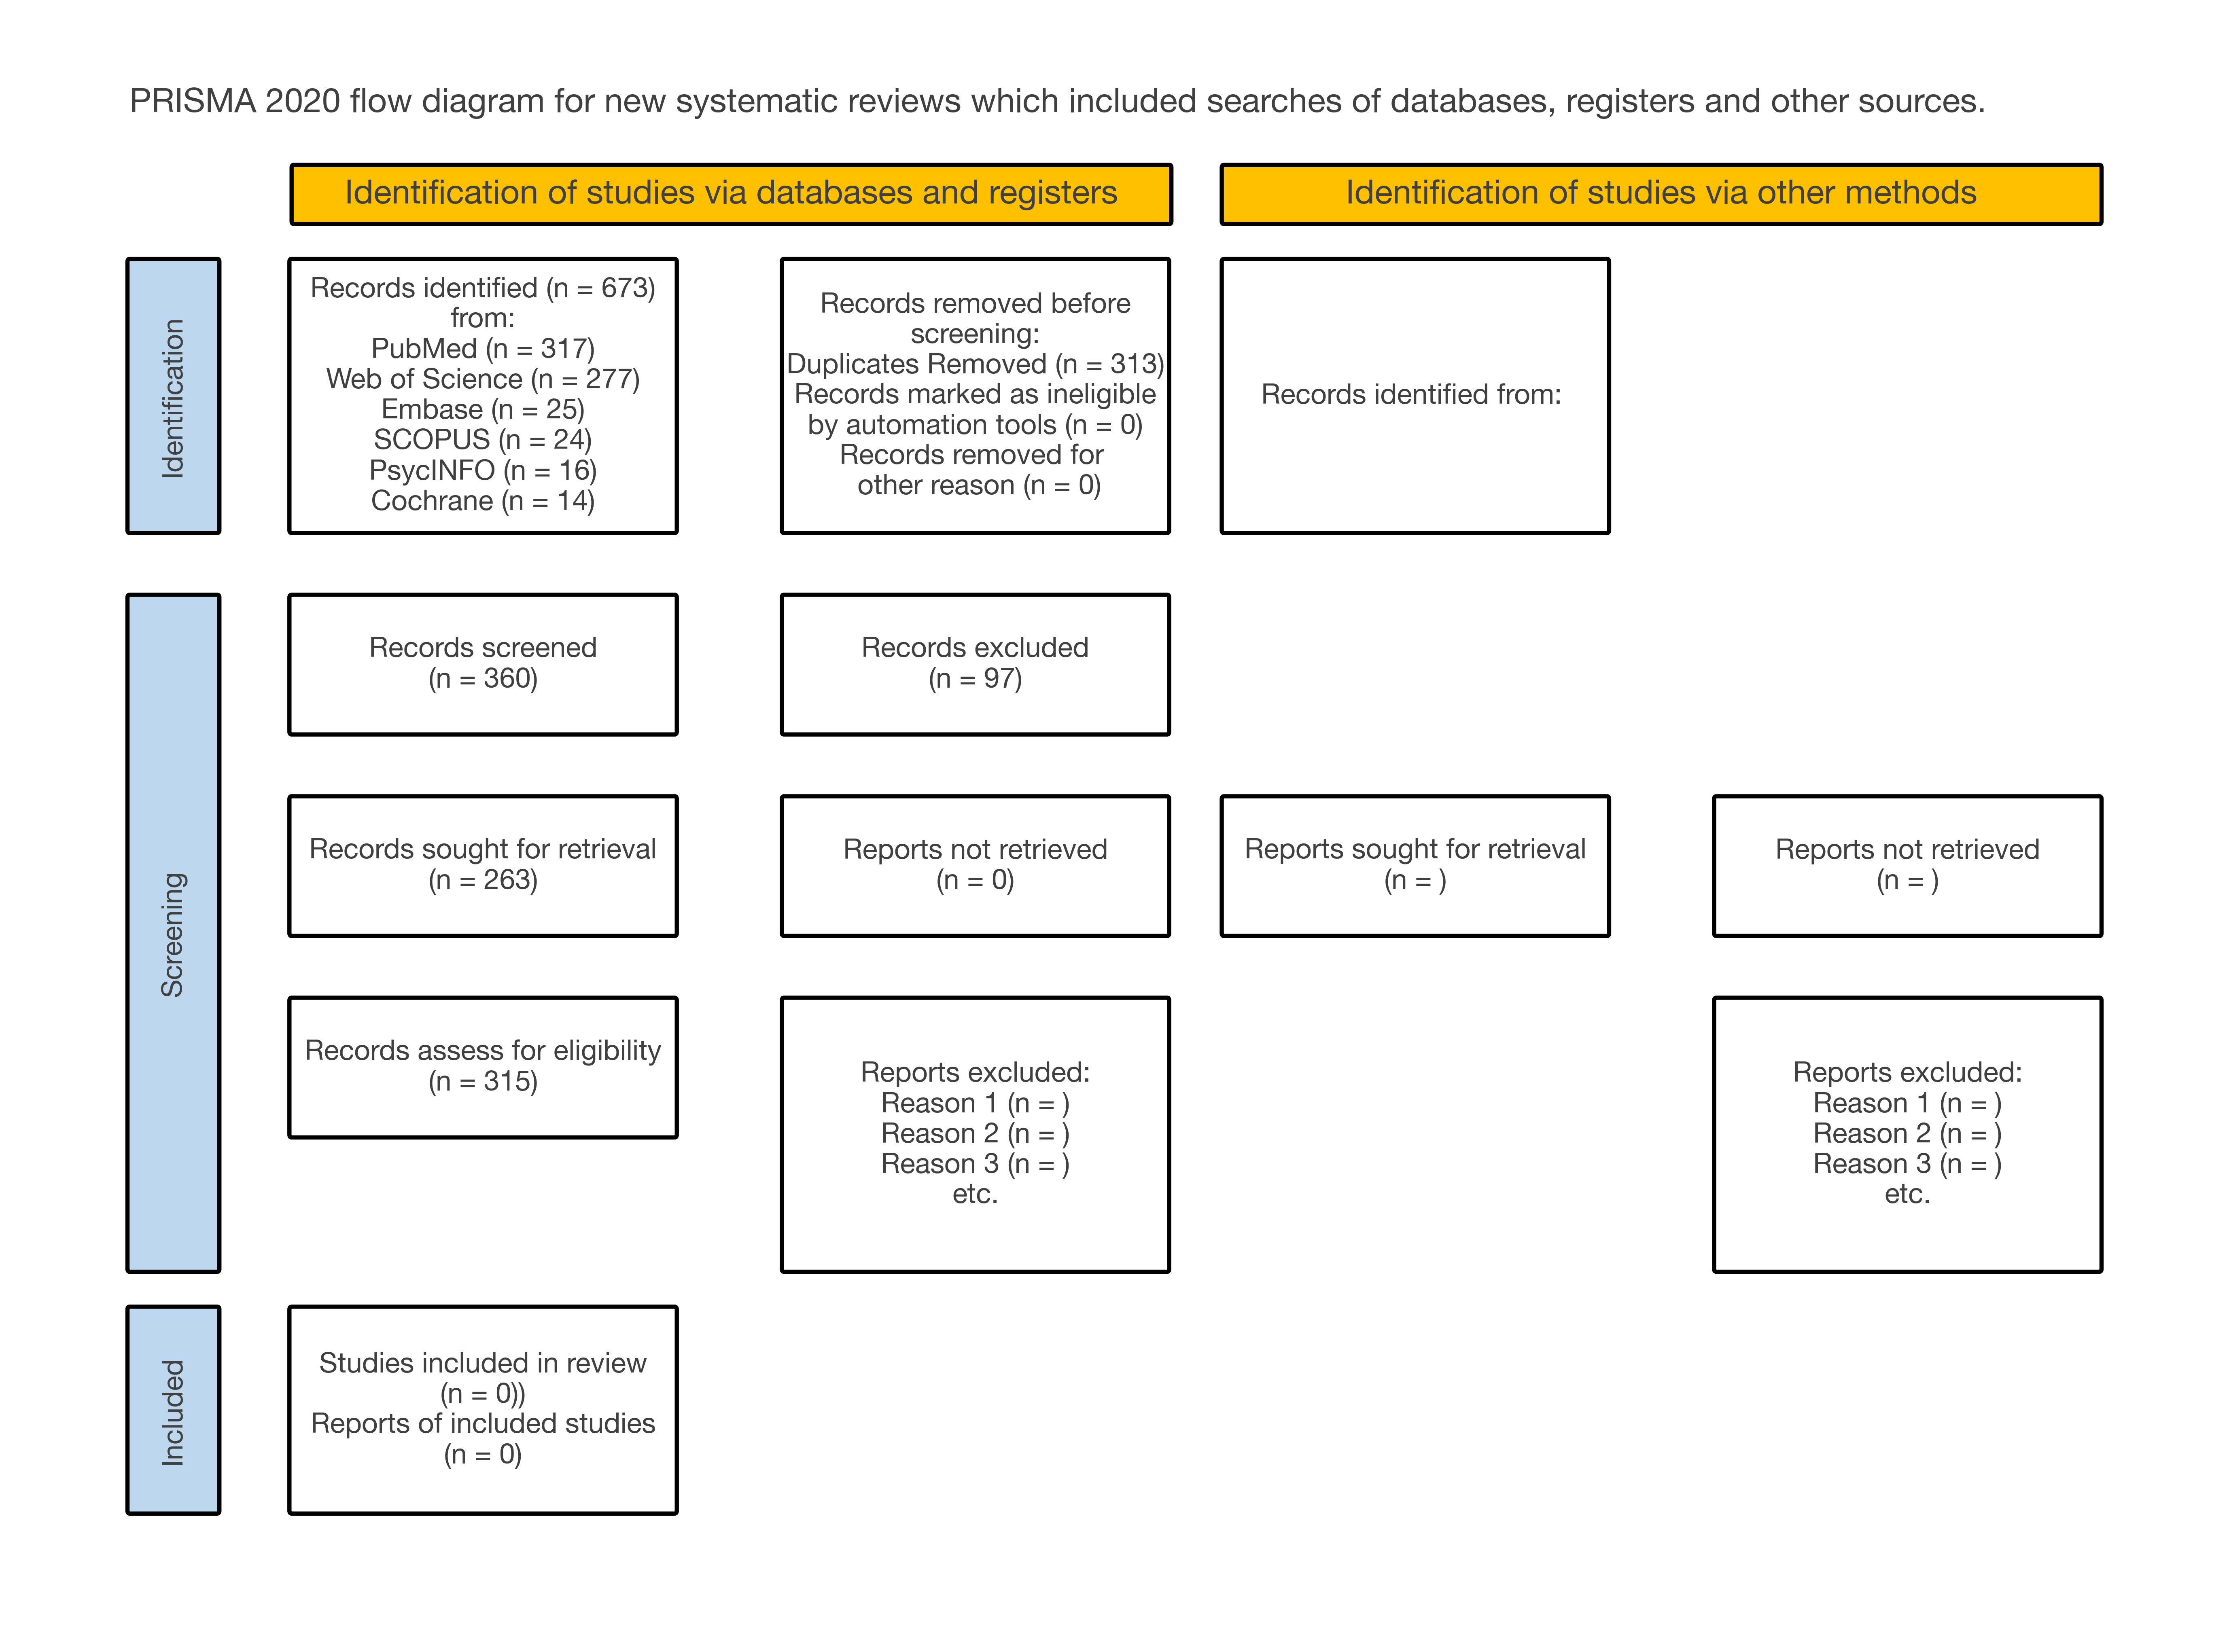

In [ ]:
from matplotlib.patches import FancyBboxPatch, Rectangle, FancyArrow

# A4 landscape size
fig, ax = plt.subplots(figsize=(11.69, 8.27))
ax.axis('off')

# Set axis limits
ax.set_xlim(0, 20)
ax.set_ylim(0, 12)

# Draw title in top-left corner (using ax.text instead of suptitle)
ax.text(1, 11.5, 
        "PRISMA 2020 flow diagram for new systematic reviews which included searches of databases, registers and other sources.",
        fontsize=12, fontweight='bold', ha='left', va='top')

# Function to draw yellow header box
def draw_yellow_box(ax, x, y, width, height, text, fontsize=12):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#FFC000",
        linewidth=1.5
    )
    ax.add_patch(box)
    ax.text(
        x + width / 2, y + height / 2, text,
        ha='center', va='center',
        fontsize=fontsize, fontweight='bold'
    )

# Draw first yellow header box below the title
draw_yellow_box(ax, x=2.5, y=10.5, width=8, height=0.4, 
                text="Identification of studies via databases and registers")

# Draw second yellow box beside it
draw_yellow_box(ax, x=11, y=10.5, width=8, height=0.4,
                text="Identification of studies via other methods")

def draw_vertical_blue_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="#BDD7EE",  # Light blue (similar to PRISMA)
        linewidth=1.5
    )
    ax.add_patch(box)
    
    # Rotated text (90 degrees, bottom to top)
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        rotation=90,  # rotate 90 degrees counterclockwise
        fontsize=fontsize, fontweight='bold'
    )

draw_vertical_blue_box(ax, x=1, y=8.2, width=0.8, height=2, text="Identification")
draw_vertical_blue_box(ax, x=1, y=2.7, width=0.8, height=5, text="Screening")
draw_vertical_blue_box(ax, x=1, y=0.9, width=0.8, height=1.5, text="Included")

def draw_white_box(ax, x, y, width, height, text, fontsize=10):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.02",
        edgecolor="black",
        facecolor="white",
        linewidth=1.5
    )
    ax.add_patch(box)
    
    ax.text(
        x + width/2, y + height/2, text,
        ha='center', va='center',
        fontsize=fontsize
    )

# Column 1
draw_white_box(ax, x=2.48, y=8.2, width=3.5, height=2, 
            text="Records identified (n = {})\nfrom:\n{}".format(
                database_counts['Count'].sum(),
                "\n".join(
                    f"{db} (n = {count})" 
                    for db, count in zip(
                        database_counts['Database'],
                        database_counts['Count']
                    )
                )
            )
)
draw_white_box(ax, x=2.48, y=6.7, width=3.5, height=1, 
            text=f"Records screened\n(n = {len(records_screened)})")
draw_white_box(ax, x=2.48, y=5.2, width=3.5, height=1, 
            text=f"Records sought for retrieval\n(n = {len(records_retrieval_sort)})")
draw_white_box(ax, x=2.48, y=3.7, width=3.5, height=1, 
            text=f"Records assess for eligibility\n(n = {len(database_ft_review)})")
draw_white_box(ax, x=2.48, y=0.9, width=3.5, height=1.5, 
            text=f"Studies included in review\n(n = 0))\n"
            f"Reports of included studies\n(n = 0)")

# Column 2
draw_white_box(
    ax, x=6.98, y=8.2, width=3.5, height=2,
    text="Records removed before\nscreening:\n" + "\n".join(
        f"{col} (n = {records_removed_before_screening[col].iloc[0]})"
        for col in records_removed_before_screening.columns
    )
)
draw_white_box(ax, x=6.98, y=6.7, width=3.5, height=1, 
            text=f"Records excluded\n(n = {len(title_abstract_excluded)})")
draw_white_box(ax, x=6.98, y=5.2, width=3.5, height=1, 
            text=f"Reports not retrieved\n(n = {reports_not_retrieved})")
draw_white_box(ax, x=6.98, y=2.7, width=3.5, height=2, 
            text="Reports excluded:\n"
            "Reason 1 (n = )\n"
            "Reason 2 (n = )\n"
            "Reason 3 (n = )\n"
            "etc.")

# Column 3
draw_white_box(ax, x=11, y=8.2, width=3.5, height=2, 
            text="Records identified from: ")
draw_white_box(ax, x=11, y=5.2, width=3.5, height=1, 
            text="Reports sought for retrieval\n(n = )")

# Column 4
draw_white_box(ax, x=15.5, y=5.2, width=3.5, height=1, 
            text="Reports not retrieved\n(n = )")
draw_white_box(ax, x=15.5, y=2.7, width=3.5, height=2, 
            text="Reports excluded:\n"
            "Reason 1 (n = )\n"
            "Reason 2 (n = )\n"
            "Reason 3 (n = )\n"
            "etc.")

plt.tight_layout()
output_path = "/".join([figures_path, "prisma_diagram.pdf"])
plt.savefig(output_path)
plt.show()